## Text Analysis-WordCloud-Indeed

### Summary

This project covers text analysis for jobs summary in **indeed_jobs.csv** dataset and creating a Word Cloud.

The data was obtained by scraping <a href="https://www.indeed.com/">Indeed</a> web pages included in my project **WebScraping-Indeed**.

It uses Numpy and Pandas libraries for data manipulation and Matplotlib and Seaborn for visualizations. 

For text analysis is used Natural Language Toolkit (NLTK).

In [1]:
# Import libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
#sns.set_style('darkgrid')
import nltk
from nltk import word_tokenize
from nltk.corpus import stopwords
from collections import Counter 
from wordcloud import WordCloud, STOPWORDS
from PIL import Image

%matplotlib inline

### Load data

The dataset **indeed_jobs.csv** has **1296 rows and 5 columns**.

Each row contains details about one job posting: **Title, Company, Location, Salary and Summary**. All columns are of type
'object'.

In [2]:
# Read the csv file with all scraped data
jobs = pd.read_csv("indeed_jobs.csv")

# Print the shape and the first rows
print("Dataframe shape: ", jobs.shape)
print()
jobs.head()

Dataframe shape:  (1296, 5)



,Title,Company,Location,Salary,Summary
0,"AI/ML - Chief of Staff, Machine Intelligence",Apple,"Seattle, WA",NaN,The Machine Intelligence team is accelerating ...
1,"Senior Data Scientist, Rich Media Experiences",Zillow,Washington State•Remote,"$127,100 - $203,000 a year",Using Computer Vision techniques and AI-powere...
2,Machine Learning Engineer,Zillow,Washington State•Remote,"$132,400 - $211,600 a year",These algorithms and platforms ingest large vo...
3,Senior Data Scientist,Zillow,Washington State•Remote,"$127,100 - $203,000 a year",This data can be mined for intelligence on com...
4,"Research Program Manager, Artificial Intelligence",Facebook,"New York, NY",NaN,"We drive efficiency, cultivate relationships, ..."


### Remove duplicates

In [3]:
# Remove duplicates and reset the index of the dataframe

# Drop duplicates
jobs = jobs.drop_duplicates()

# Reset the index of the df
jobs = jobs.reset_index(drop=True)

# Print the shape of cleaned dataframe
print("Shape of dataframe without duplicates: ", jobs.shape)
#jobs.head()

Shape of dataframe without duplicates:  (304, 5)


### Text cleaning and preparation

We need to **streamline the job summary** using **NLP (Natural Language Processing)** techniques.

We follow the next **steps**:
- define a function to clean the text: **tokenize, convert to lowercase, filter the stopwords**
- apply the function to Summary column
- create a dictionary with each word and the sum of its occurrences in the text 
- visualize results for specific words

In [4]:
def clean_text(summary):
    """Clean the job summary"""
    
    # Tokenize the text
    summary = word_tokenize(summary)
    # Find the words and set them to lowercase
    summary = [word.lower() for word in summary if word.isalpha() and len(word) > 2]
    # Create a list of words, filtering the stop words
    summary = [word for word in summary if word not in stop_words]
    
    return summary

In [5]:
# Get the English stopwords
stop_words = stopwords.words("english")

# Create a pandas Series with tokenized words for each job summary
tags_jobs = jobs["Summary"].apply(clean_text) 

In [6]:
tags_jobs

0      [machine, intelligence, team, accelerating, cr...
1      [using, computer, vision, techniques, algorith...
2      [algorithms, platforms, ingest, large, volumes...
3      [data, mined, intelligence, competitive, custo...
4      [drive, efficiency, cultivate, relationships, ...
                             ...                        
299    [expert, experience, pulling, large, complex, ...
300    [bachelors, degree, mathematics, statistics, d...
301    [work, large, complex, data, analysts, data, s...
302    [job, description, primary, location, assessme...
303    [experience, statistical, reporting, manufactu...
Name: Summary, Length: 304, dtype: object

In [7]:
# Create a dictionary with each word and the sum of its occurences in the text
result = tags_jobs.apply(Counter).sum().items()

# Sort the dictionary in decending order after the number of occurences for each word 
result = sorted(result, key=lambda kv: kv[1], reverse=True)

# Create a pandas Series
results_series = pd.Series({k:v for k, v in result})

In [8]:
# Check the first rows
results_series.head()

data          289
learning      108
experience     91
machine        77
science        50
dtype: int64

### Count of specific word occurrences in the jobs Summary

Text(0.5, 1.0, 'Count of Words in Summary')

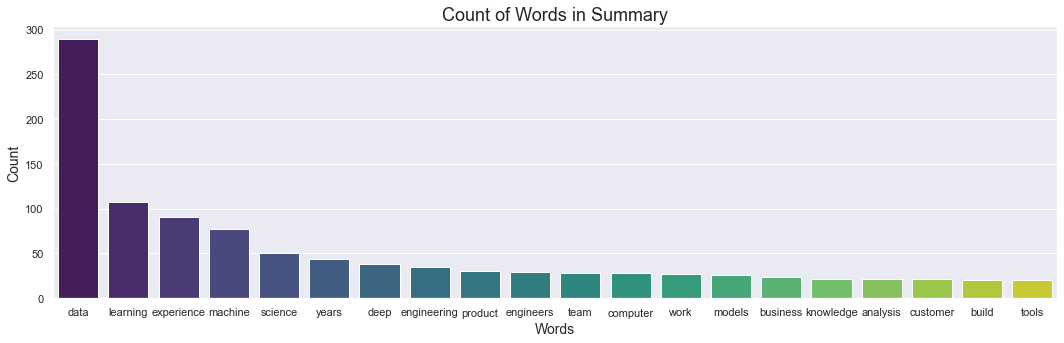

In [9]:
# Visualize the word count in the jobs summary

# Define figure size
sns.set(rc={"figure.figsize":(18, 5)}) 

# Display barplot
sns.barplot(x=results_series[:20].index, y=results_series[:20], palette="viridis")

# Set the x, y labels and plot title
plt.xlabel('Words', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.title('Count of Words in Summary', fontsize=18)

The most frequent word is **data** with a count of **289 occurences** in all job's summary. <br>
A lower count, between 50 and 100, have **learning**, **experience**, **machine** and **science**.<br>
The rest of the words have a count lower than 50.


Next, we are interested in comparing the count of specific words. <br>
These words describe various **analytical tools**, **cloud platforms**, top **skills in demand** or different 
**data science roles**.

In [10]:
# Create lists with specific words


# Data analytics tools
tools = ["tableau", 'powerbi', 'qlik'] 

# Cloud computing platforms
platforms = ["aws", 'azure'] 

# Different roles: data analyst/scientist/ml engineer
roles = ["analyst", 'science', 'ml'] 

# Position types
positions = ["intern", 'entry', 'senior']

In [11]:
## Prepare the filters for visualizations

filter_series1 = results_series.filter(items=tools)
filter_series2 = results_series.filter(items=platforms)
filter_series3 = results_series.filter(items=roles)
filter_series4 = results_series.filter(items=positions)

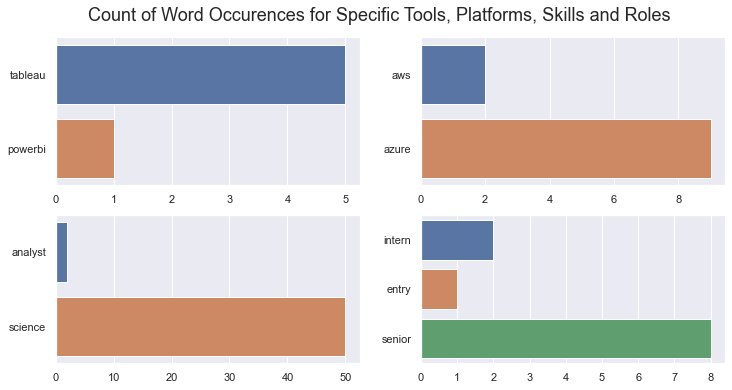

In [12]:
# Visualize specific word occurences for specific skills, roles, tools and platforms 

# Create a list with filters for specific words
cols = [filter_series1, filter_series2, filter_series3, filter_series4]

# Set plot size
fig = plt.figure(figsize=(12, 6))
# Give the plot a title
fig.suptitle('Count of Word Occurences for Specific Tools, Platforms, Skills and Roles', \
             fontsize=18, y=0.95)  
n_rows = 2
n_cols = 2
print()
for i in range(len(cols)):
    column = cols[i]
    sub = fig.add_subplot(n_rows, n_cols, i+1)
    chart = sns.barplot(x=column, y=column.index)

We can see that **Tableau is the top data analytics tool** compared with **Power BI**.

**Azure is the preferred cloud computing platform** comparing with **Amazon Web Services (AWS)**.

The roles as **data scientist** are in more demand than **data analyst**. Other roles like data engineer, machine learning engineer 
or staff machine intelligence are less present in this scraped dataset.

**Most** of the **position types** are for **senior level**, followed by **intern and entry level**.

### Create a Word Cloud

In [13]:
# Create an empty string
text = ""

# Iterate through each row in tags_jobs
for row in tags_jobs.values:
    
    # Iterate through each word in row
    for word in row:
        
        # Concatenate the words
        text = text + " " + word

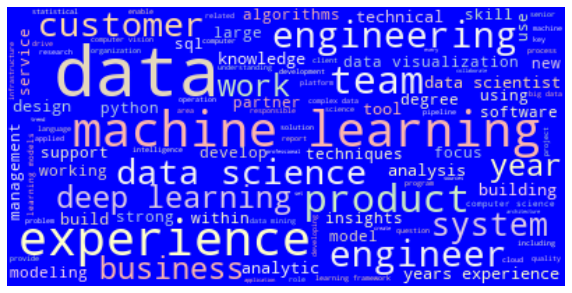

In [16]:
# Create the wordcloud
wordcloud = WordCloud(max_words=100, max_font_size=50, \
                      background_color="blue", colormap='Pastel1').generate(text)
 
# Plot the WordCloud image 
plt.figure(figsize=(10, 8))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.margins(x=0, y=0)
plt.show()

The Word Cloud shows the importance of some words in the jobs summary. They have bigger font size and among them are 
**data**, **machine learning**, **experience**, **engineering** and **customer**.